In [1]:
import pandas as pd
trainOriginal = pd.read_csv('train.csv')

In [54]:
train = trainOriginal
train['longitud'] = trainOriginal.text.map(lambda x: len(x)) 
train.head()

,id,keyword,location,text,target,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [26]:
train.target.value_counts().rename({0: 'Falsos', 1: 'Veraderos'}).rename('')

Falsos       4342
Veraderos    3271
Name: , dtype: int64

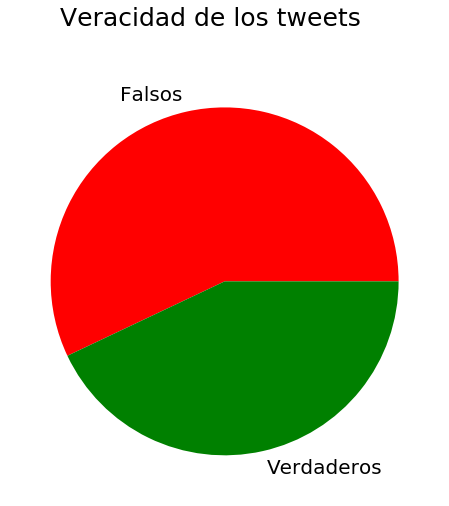

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Veracidad de los tweets', fontsize=25) 

ax = train.target.value_counts().rename({0: 'Falsos', 1: 'Verdaderos'}).rename('').plot(kind='pie', figsize=(16,8), fontsize=20, colors=['red', 'green'])

plt.show()

En el gráfico de torta se puede observar que la cantidad de tweets falsos es mayor a la cantidad de tweets verdaderos.

In [458]:
verdaderos = train[train['target'] == 1]
verdaderos.head()

,id,keyword,location,text,target,longitud,cantPalabras
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17


In [298]:
verdaderosDescribe = verdaderos.longitud.describe().rename('Verdaderos').drop(labels='count')
verdaderosDescribe

mean    108.113421
std      29.309854
min      14.000000
25%      88.000000
50%     115.000000
75%     136.000000
max     151.000000
Name: Verdaderos, dtype: float64

In [459]:
falsos = train[train['target'] == 0]
falsos.head()

,id,keyword,location,text,target,longitud,cantPalabras
15,23,NaN,NaN,What's up man?,0,14,3
16,24,NaN,NaN,I love fruits,0,13,3
17,25,NaN,NaN,Summer is lovely,0,16,3
18,26,NaN,NaN,My car is so fast,0,17,5
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28,3


In [299]:
falsosDescribe = falsos.longitud.describe().rename('Falsos').drop(labels='count')
falsosDescribe

mean     95.706817
std      35.885924
min       7.000000
25%      68.000000
50%     101.000000
75%     130.000000
max     157.000000
Name: Falsos, dtype: float64

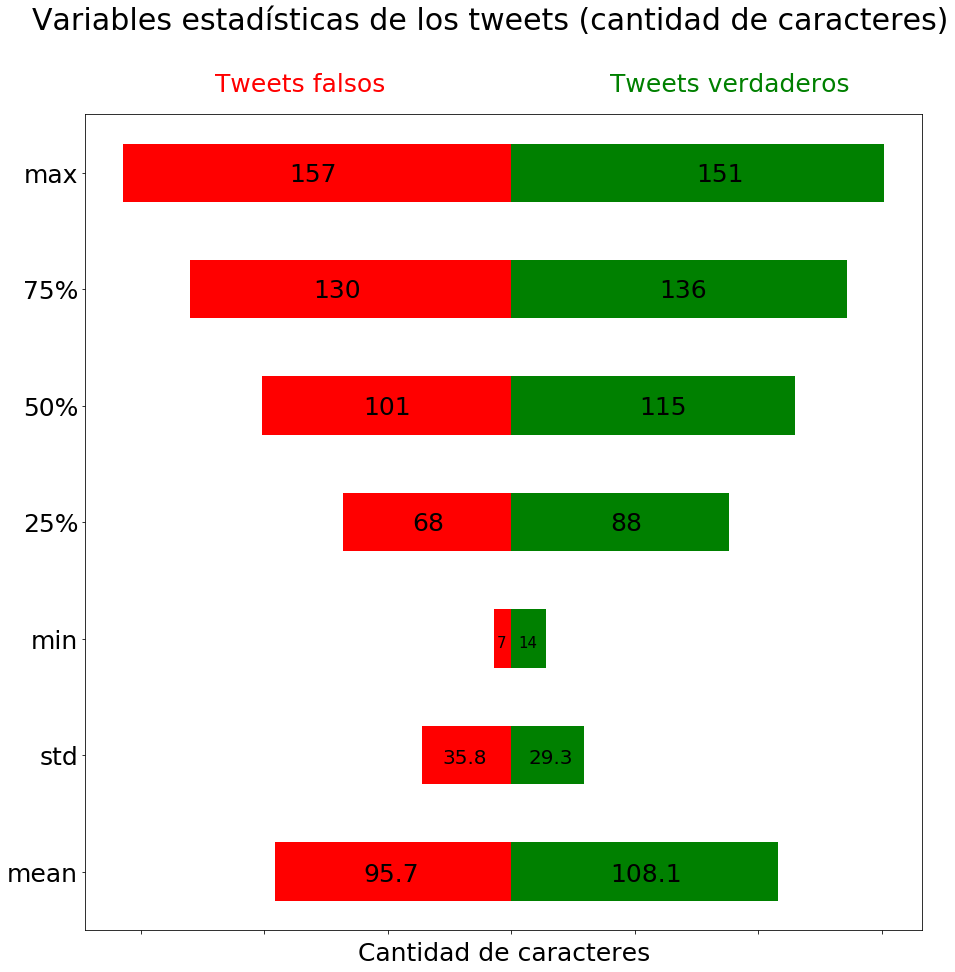

In [498]:
fig2 = plt.figure(figsize=[15,15])
fig2.suptitle('Variables estadísticas de los tweets (cantidad de caracteres)', fontsize=30) 
plt.text(-120, 6.7, 'Tweets falsos', fontsize=25, color='red')
plt.text(40, 6.7, 'Tweets verdaderos', fontsize=25, color='green')

plt.text(-90, 5.93, '157', fontsize=25)
plt.text(75, 5.93, '151', fontsize=25)
plt.text(-80, 4.93, '130', fontsize=25)
plt.text(60, 4.93, '136', fontsize=25)
plt.text(-60, 3.93, '101', fontsize=25)
plt.text(52, 3.93, '115', fontsize=25)
plt.text(-40, 2.93, '68', fontsize=25)
plt.text(40, 2.93, '88', fontsize=25)
plt.text(-5.8, 1.93, '7', fontsize=15)
plt.text(3, 1.93, '14', fontsize=15)
plt.text(-28, 0.93, '35.8', fontsize=20)
plt.text(7, 0.93, '29.3', fontsize=20)
plt.text(-60, -0.08, '95.7', fontsize=25)
plt.text(40, -0.08, '108.1', fontsize=25)

ax = verdaderosDescribe.plot(kind='barh', color='green')
ax2 = (-1*falsosDescribe).plot(kind='barh', color='red', fontsize=25)
plt.xlabel('Cantidad de caracteres', fontsize=25)
ax2.set_xticklabels([])
plt.show()

Analizandos las variables estadísticas de los tweets en base a la cantidad de caracteres, se puede observar que los tweets verdaderos son en promedio más largos que los tweets falsos, que la desviación estándar de los falsos es mayor que la de los verdaderos y que los cuantiles de los verdaderos son mayores que los de los falsos.

In [456]:
train['cantPalabras'] = train.text.map(lambda x: len(x.split(' ')))
train

,id,keyword,location,text,target,longitud,cantPalabras
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,17
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,20
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,19


In [461]:
verdaderosPalabrasDescribe = verdaderos.cantPalabras.describe().rename('Verdaderos').drop(labels='count')
verdaderosPalabrasDescribe

mean    15.201162
std      5.184417
min      2.000000
25%     11.000000
50%     15.000000
75%     19.000000
max     54.000000
Name: Verdaderos, dtype: float64

In [463]:
falsosPalabrasDescribe = falsos.cantPalabras.describe().rename('Falsos').drop(labels='count')
falsosPalabrasDescribe

mean    14.723860
std      6.188171
min      1.000000
25%     10.000000
50%     15.000000
75%     19.000000
max     31.000000
Name: Falsos, dtype: float64

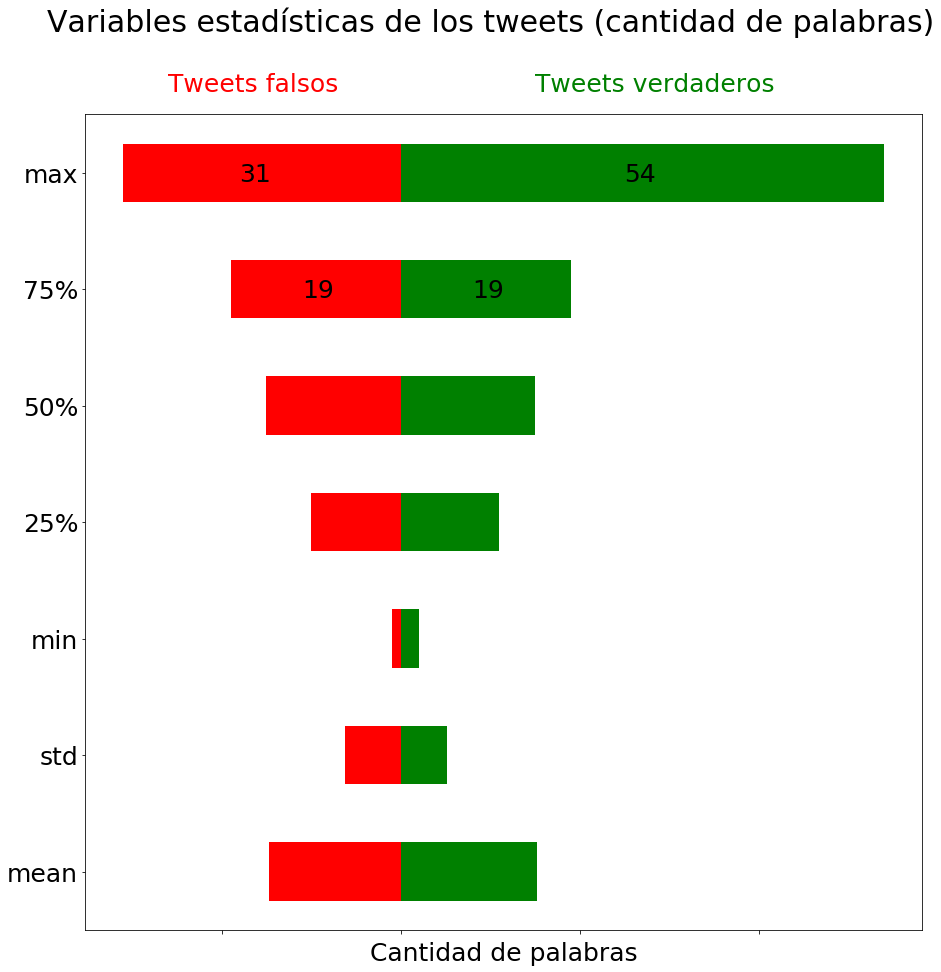

In [507]:
fig3 = plt.figure(figsize=[15,15])
fig3.suptitle('Variables estadísticas de los tweets (cantidad de palabras)', fontsize=30) 
plt.text(-26, 6.7, 'Tweets falsos', fontsize=25, color='red')
plt.text(15, 6.7, 'Tweets verdaderos', fontsize=25, color='green')

plt.text(-18, 5.93, '31', fontsize=25)
plt.text(25, 5.93, '54', fontsize=25)
plt.text(-11, 4.93, '19', fontsize=25)
plt.text(8, 4.93, '19', fontsize=25)
#plt.text(-60, 3.93, '101', fontsize=25)
#plt.text(52, 3.93, '115', fontsize=25)
#plt.text(-40, 2.93, '68', fontsize=25)
#plt.text(40, 2.93, '88', fontsize=25)
#plt.text(-5.8, 1.93, '7', fontsize=15)
#plt.text(3, 1.93, '14', fontsize=15)
#plt.text(-28, 0.93, '35.8', fontsize=20)
#plt.text(7, 0.93, '29.3', fontsize=20)
#plt.text(-50, -0.08, '68', fontsize=25)
#plt.text(50, -0.08, '88', fontsize=25)

ax3 = verdaderosPalabrasDescribe.plot(kind='barh', color='green')
ax4 = (-1*falsosPalabrasDescribe).plot(kind='barh', color='red', fontsize=25)
plt.xlabel('Cantidad de palabras', fontsize=25)
ax4.set_xticklabels([])
plt.show()